# Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [1]:
names_list = names.split(', ')

NameError: name 'names' is not defined

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep = ';')

In [6]:
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


# Вернёмся к данным о поездках на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!

journey_id – уникальный id поездки \
user_id – id пользователя\
driver_id – id водителя
taxi_id – id машины\
icon – тип поездки\
start_type – тип заказа (asap, reserved, delayed)\
start_at – время начала поездки\
start_lat – исходное местоположение пользователя, широта\
start_lon – исходное местоположение пользователя, долгота\
end_at – время окончания поездки\
end_lat – итоговое местоположение, широта\
end_lon – итоговое местоположение, долгота\
end_state – состояние заказа\
driver_start_lat – исходное местоположение водителя, широта\
driver_start_lon – исходное местоположение водителя, долгота\
arrived_at – время прибытия водителя\
source – платформа, с которой сделан заказ\
driver_score – оценка водителя клиентом\
rider_score – оценка клиента водителем\

Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя. Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.

In [8]:
def clean_col(name):
    return (
        name.replace('at', 'dates')
    )

taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep=';',
                   parse_dates = ['start_at','end_at','arrived_at'])


In [10]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

# Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого

In [16]:
taxi['source'].unique()

array(['iPhone', 'Android', 'web', 'iPad', nan, 'Wap'], dtype=object)

In [43]:
taxi.source.value_counts() / taxi.shape[0]*100

iPhone     42.148760
web        33.018909
Android    21.240968
iPad        2.470685
Wap         0.588464
Name: source, dtype: float64

In [48]:
taxi.source.value_counts(normalize=True, dropna=True)*100

iPhone     42.374282
web        33.195580
Android    21.354620
iPad        2.483905
Wap         0.591613
Name: source, dtype: float64

In [60]:
round(taxi.source\
    .value_counts(normalize=True, dropna=True)\
    .mul(100)\
    .max()    
)

42

# Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

Посчитайте частоту встречаемости каждой из оценок\
Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))\
Сбросьте индексы\
Переименуйте колонки в driver_score и percentage\
Отсортируйте по driver_score в порядке возрастания (от 0 до 5)\
Запишите результат в driver_score_counts\

Полезные функции:

.mul() – умножение, более удобный вариант для использования в цепочке методов \
.round() – округление\
.reset_index() – сбросить индекс\
.value_counts() – сколько раз встречается каждое значение переменной\

In [72]:
taxi_driver_score = taxi.driver_score\
    .value_counts(normalize=True, dropna=True)\
    .mul(100)\
    .round(2)\
    .reset_index()\
    .rename(columns = {'index':'driver_score','driver_score':'percentage' })\
    .sort_values('driver_score')
taxi_driver_score

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


# Теперь строим график! Сначала импортируем библиотеки:

>>import seaborn as sns
import matplotlib.pyplot as plt

Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:

>>ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)\
ax.set(xlabel='Driver score', ylabel='Percentage')\
sns.despine()  # убрать часть рамки графика\
plt.show()\

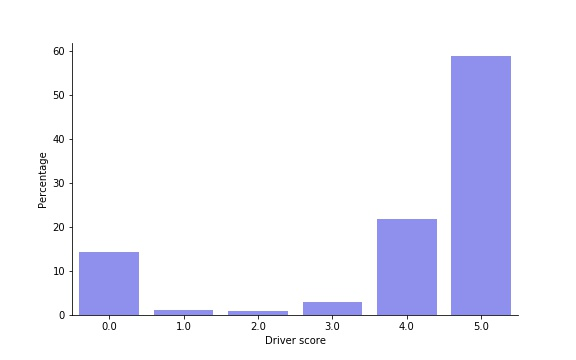

# 💀 Сложное задание! 💀

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [75]:
taxi_rider_score = taxi.rider_score\
    .value_counts(normalize=True, dropna=True)\
    .mul(100)\
    .round(2)\
    .reset_index()\
    .rename(columns = {'index':'rider_score','rider_score':'percentage' })\
    .sort_values('rider_score')
taxi_rider_score

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


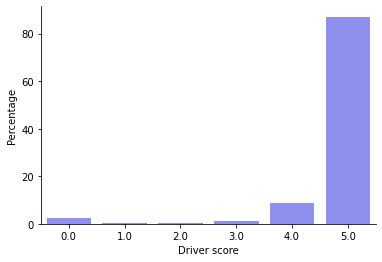

In [80]:
ax = sns.barplot(x='rider_score', y='percentage', data=taxi_rider_score, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine() # убрать часть рамки графика
plt.show()